<a href="https://colab.research.google.com/github/punramon/bsc_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Data

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc_dpdm24_data'

Mounted at /content/drive


In [92]:
apndx_data = pd.read_csv(os.path.join(path,'apndx.csv'))

In [93]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [94]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [95]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna(value='No')

In [96]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                260000 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [97]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,Hypertension,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,Hypertension,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,Hypertension,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,Hypertension,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,Diabetes,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [98]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna('No')

In [99]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


- ใช้กับคนใข้มาใหม่ - ลบ column ที่มาจากอนาคต -> รู้ว่าเป็นแล้ว
- หรือทายเลยจากประวัติ

In [100]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                260000 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [101]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

- แต่ละอาการมีทั้งเป็นโรคไม่เป็นโรค

In [102]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

## ลบข้อมูลหลังจากที่รู้ว่าเป็นหรือไม่เป็นมะเร็งแล้ว

In [103]:
# prompt: droup column Diagnosis_Delay_Days, Treatment_Type,Survival_Years_After_Diagnosis

apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,No,No,136,159,7.5,5.2,344,Negative,Moderate,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,No,Yes,141,268,8.0,5.0,195,Negative,Moderate,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,No,...,No,No,95,156,7.8,5.5,201,Positive,Moderate,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,No,...,No,No,107,226,7.9,5.1,386,Negative,Moderate,No


## ลบข้อมูลที่ไม่น่าจะสร้างโมเดลได้

In [104]:
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])
apndx_data.head()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,71,Male,31.8,Yes,Low,No,No,No,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,No


## แปลง data ให้เป็นตัวเลขทั้งหมด

- 0:F 1:M
- 0:N 1:Y

In [65]:
mapping = {'Yes':1, 'No':0}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(mapping)

mapping = {'Low':0, 'Moderate':1, 'High':2 }
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(mapping)

mapping = {'Low':0, 'Moderate':1, 'High':2 }
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(mapping)

mapping = {'Yes':1, 'No':0}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(mapping)

mapping = {'Negative':1, 'Positive':0}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(mapping)

mapping = {'Low':0, 'Moderate':1,'High':2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(mapping)

apndx_data.info()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,0,28.6,0,1,1,0,0,0,0,0,0,156,228,8.1,4.4,361,0,0,1
1,83,0,19.4,0,1,0,0,0,1,0,0,0,117,186,9.7,6.2,235,0,1,0
2,52,0,17.2,0,1,1,0,0,1,0,0,0,115,231,8.2,4.6,269,0,1,0
3,71,1,31.8,1,1,0,0,2,0,0,0,1,149,151,6.8,6.0,193,0,1,0
4,19,0,17.7,0,1,0,0,1,2,0,0,0,179,236,6.7,4.9,396,0,0,0


In [105]:
Smoking_maping = {'Yes': 1, 'No': 0}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(Smoking_maping)

Alcohol_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(Alcohol_maping)

Family_maping = {'Yes': 1, 'No': 0}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(Family_maping)

Genetic_maping = {'Yes': 1, 'No': 0}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(Genetic_maping)

Physical_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(Physical_maping)

Radiation_Exposure_maping = {'Yes': 1, 'No': 0}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(Radiation_Exposure_maping)

Previous_maping = {'Yes': 1, 'No': 0}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(Previous_maping)

Tumores_maping = {'Negative': 0, 'Positive': 1}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(Tumores_maping)

Symptom_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(Symptom_maping)

In [106]:
apndx_data.head()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,0,0,1,0,Diabetes,2,Non-Vegetarian,0,0,156,228,8.1,4.4,361,0,NaN,Yes
1,83,Female,19.4,0,0,0,0,Diabetes,0,Non-Vegetarian,0,0,117,186,9.7,6.2,235,0,1.0,No
2,52,Female,17.2,0,0,1,0,Diabetes,0,Non-Vegetarian,0,0,115,231,8.2,4.6,269,0,1.0,No
3,71,Male,31.8,1,0,0,0,No,2,Non-Vegetarian,0,1,149,151,6.8,6.0,193,0,1.0,No
4,19,Female,17.7,0,0,0,0,Hypertension,1,Non-Vegetarian,0,0,179,236,6.7,4.9,396,0,NaN,No


In [107]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

# Transform the categorical features into one-hot encoded features
encoded_features = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))

# Concatenate the encoded features with the original DataFrame
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)

# Optionally, drop the original categorical columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Print the updated DataFrame
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,No,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,No,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [108]:
mapping = {'Yes':1, 'No':0}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(mapping)
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            260000 non-null  int64  
 1   BMI                            260000 non-null  float64
 2   Smoking_Status                 260000 non-null  int64  
 3   Alcohol_Consumption            260000 non-null  int64  
 4   Family_History_Cancer          260000 non-null  int64  
 5   Genetic_Mutations              260000 non-null  int64  
 6   Physical_Activity_Level        260000 non-null  int64  
 7   Radiation_Exposure             260000 non-null  int64  
 8   Previous_Cancers               260000 non-null  int64  
 9   Blood_Pressure                 260000 non-null  int64  
 10  Cholesterol_Level              260000 non-null  int64  
 11  White_Blood_Cell_Count         260000 non-null  float64
 12  Red_Blood_Cell_Count          

In [109]:
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# เก็บ Test เอาไว้วัดผลตอนจบ

In [110]:
# prompt: random sampling 60000 data and also keep the rest (train test split)
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)

# Print the shapes of the resulting datasets to verify
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (200000, 26)
Shape of testing data: (60000, 26)


In [111]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,...,59732,169786,169786,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,...,10612,30214,30214,30214,30214,30214,30214,30214,30214,30214


- สัดส่วนพอๆกัน

In [41]:
30214/169786

0.17795342372162604

In [42]:
9073/50927

0.17815696978027373

In [40]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,
No,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927
Yes,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073


# เลือก Model ที่ดีที่สุด (Model Selection)

1. Decision Tree
2. Short Decision Tree
3. Naïve Bayes

### spilt data into 10 folds

In [112]:
from sklearn.model_selection import KFold, cross_val_score

In [113]:
kf = KFold(n_splits=10, shuffle=True, random_state=6)

In [114]:
X_train = train_data.drop(['Appendix_Cancer_Prediction'], axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

## Decision Tree

In [115]:
# import
from sklearn.tree import DecisionTreeClassifier
# define - set model ว่าจะหน้าตาเป็นไง
dt_classifier = DecisionTreeClassifier() #default
# train and evaluation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.72415 0.7244  0.72545 0.72505 0.7257  0.72505 0.72515 0.7213  0.72785
 0.72365]
Average cross-validation score: 0.724775
Standard deviation: 0.0015789632674638007


- Cross-validation scores -> score ของ test แต่ละก้อน
- เฉลี่ยดู

# (Short) Decision Tree

In [117]:
# import
from sklearn.tree import DecisionTreeClassifier
# define - set model ว่าจะหน้าตาเป็นไง
dt_classifier2 = DecisionTreeClassifier(max_depth=5) #ต้นไม้ 5 ชั้น
# train and evaluation
cv_scores = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.84875 0.849   0.8506  0.84955 0.8494  0.8453
 0.8493 ]
Average cross-validation score: 0.84887
Standard deviation: 0.001297343439494716


- ต้นไม้เตี้ย -> แม่นกว่าเดิม

# Naïve Bayes

In [120]:
# import
from sklearn.naive_bayes import GaussianNB
# define - set model ว่าจะหน้าตาเป็นไง
nb_classifier = GaussianNB()
# train and evaluation
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py", line 266, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py", line 426, in _partial_fit
    X, y = validate_data(self, X, y, reset=first_call)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [122]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Now, use the imputed data for training your model
nb_classifier = GaussianNB()
cv_scores = cross_val_score(nb_classifier, X_train_imputed, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cross-validation scores: [0.84915 0.84865 0.8491  0.84735 0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Average cross-validation score: 0.848785
Standard deviation: 0.0013696806197066428


# เลือก Model ที่แม่นที่สุดคือ (Short) Decision Tree มา train ด้วย all training data

In [123]:
# import
from sklearn.tree import DecisionTreeClassifier
# define - set model ว่าจะหน้าตาเป็นไง
dt_classifier2 = DecisionTreeClassifier(max_depth=5) #ต้นไม้ 5 ชั้น
# train
dt_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

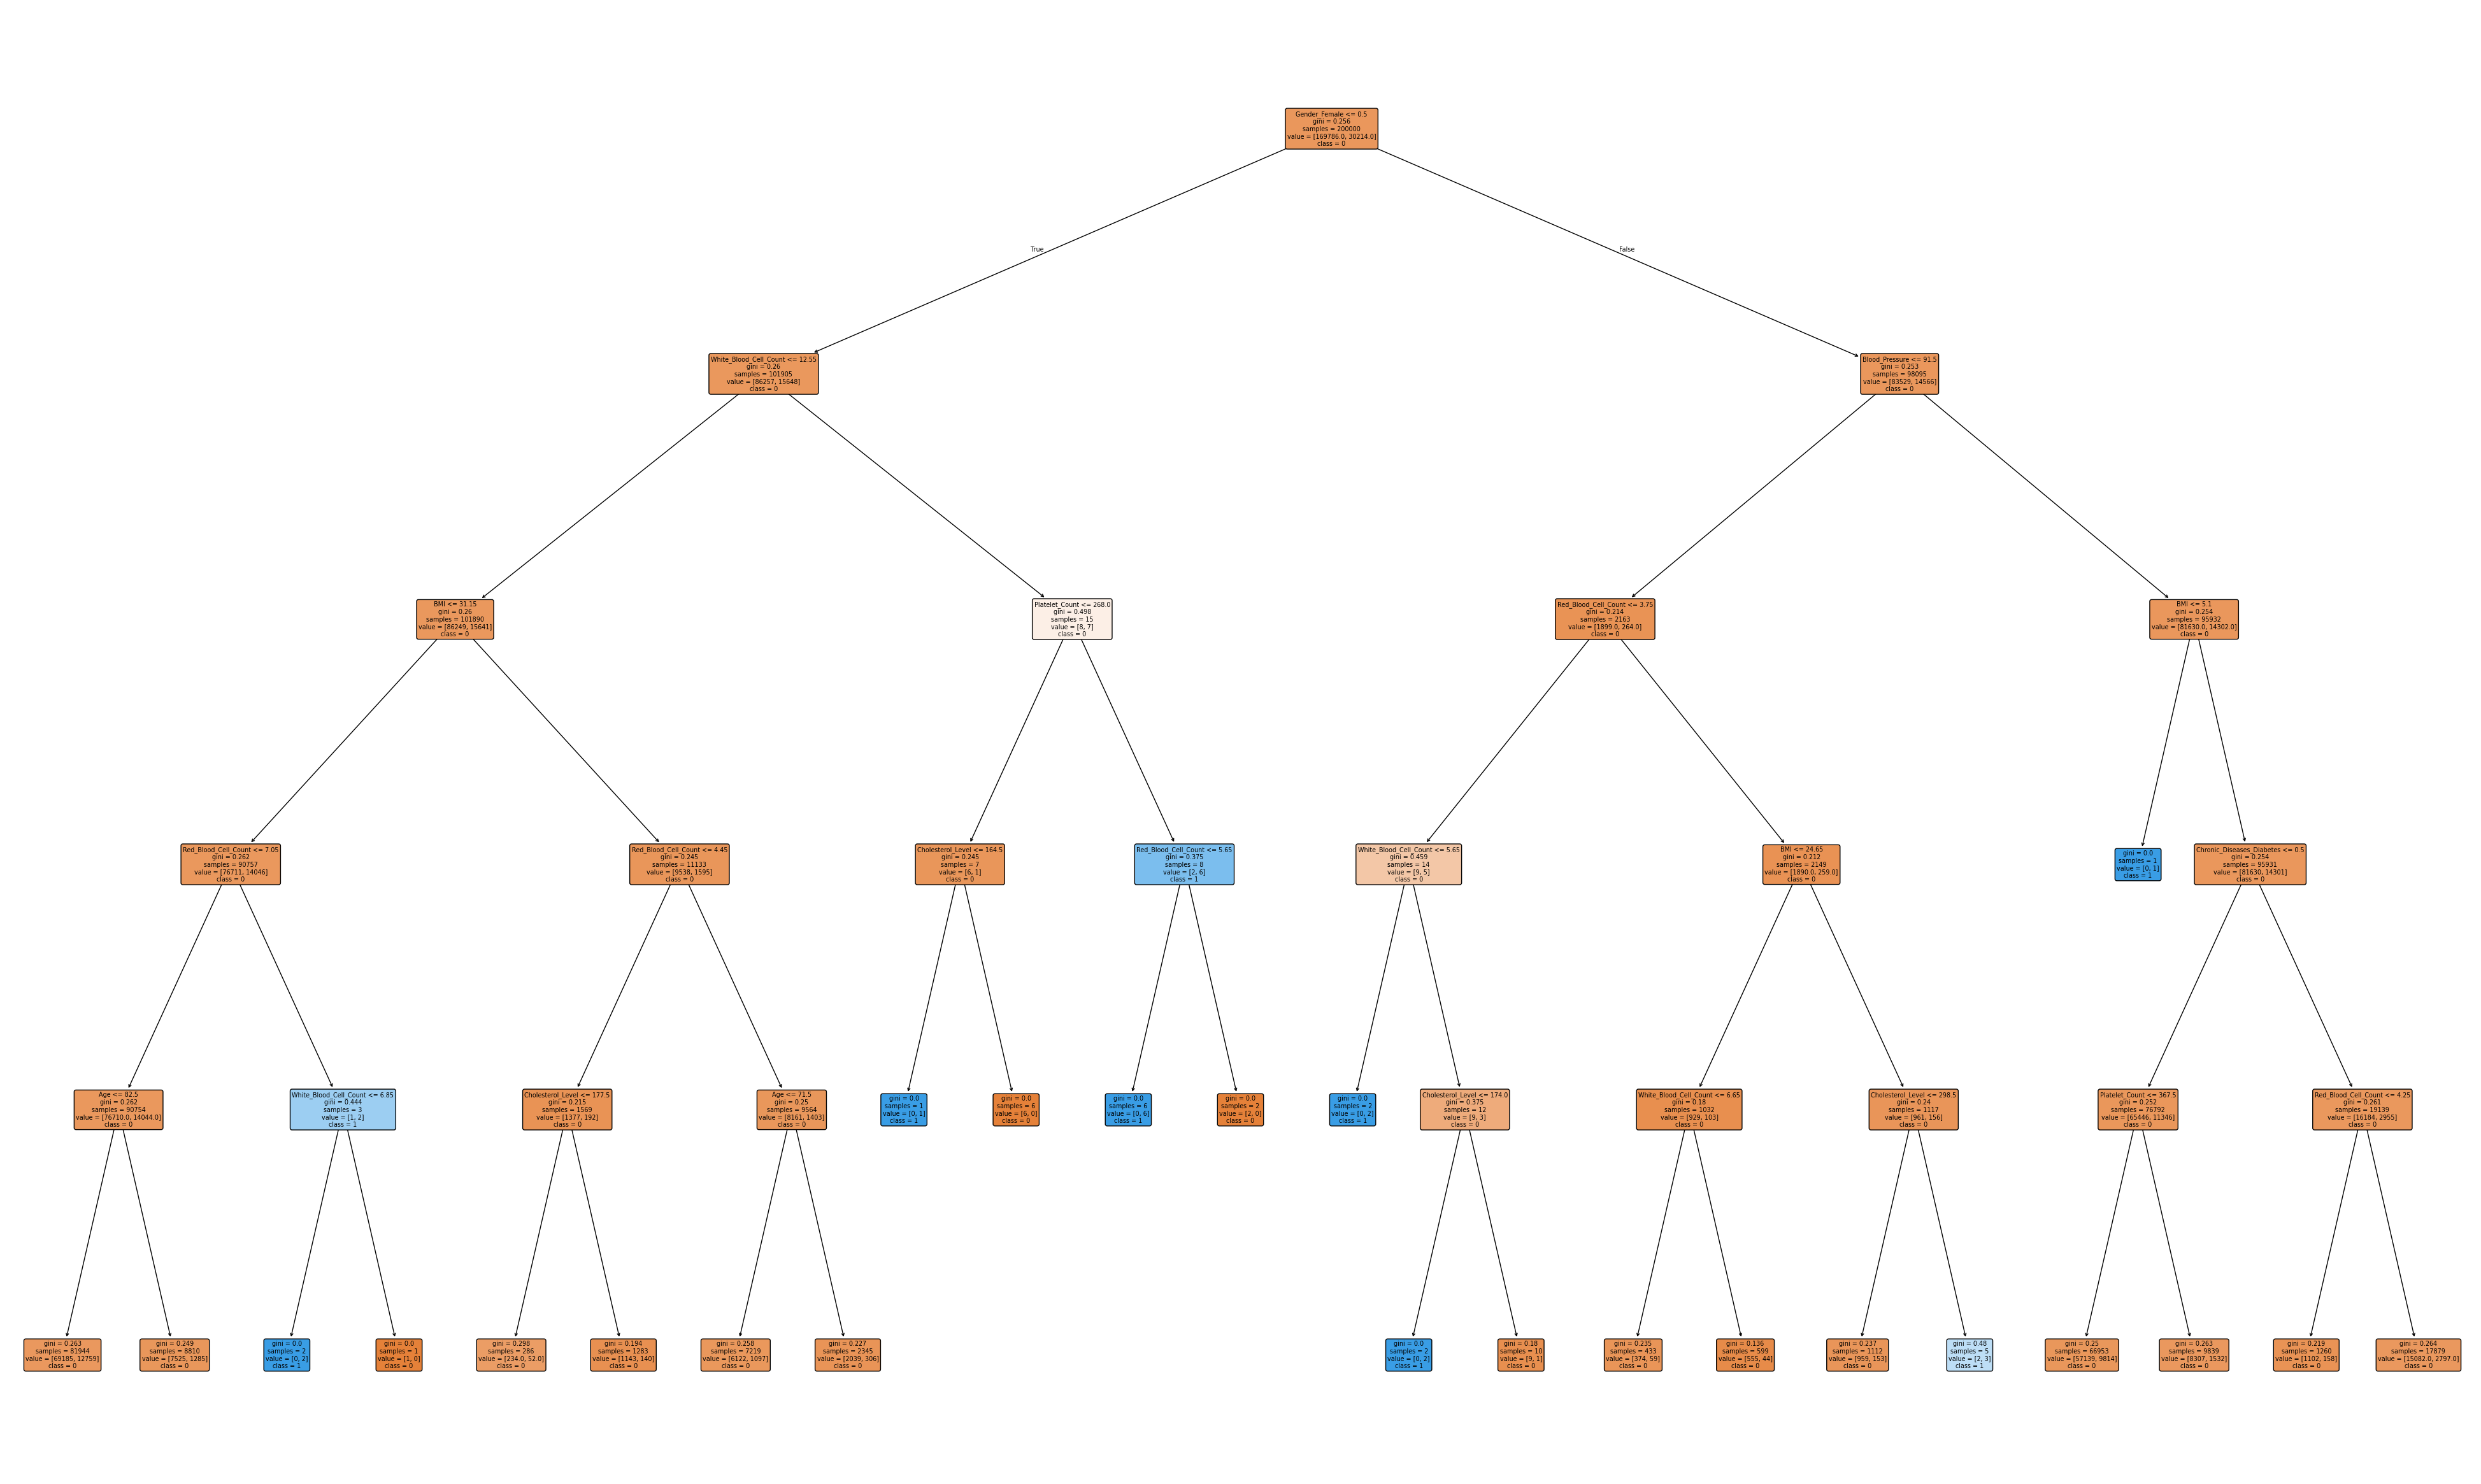

In [125]:
# prompt: show the trained tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_classifier2 is your trained decision tree model
plt.figure(figsize=(50,30))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'], rounded=True)
plt.show()


# วัดผลด้วย test data

In [130]:
X_test = test_data.drop(['Appendix_Cancer_Prediction'], axis=1)
y_actual = test_data['Appendix_Cancer_Prediction']

In [131]:
# predict
y_pred = dt_classifier2.predict(X_test)

In [132]:
# evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_pred) #ห้ามสลับ
print(f"Accuracy_score on test data: {accuracy}")

Accuracy_score on test data: 0.8487333333333333


#Quiz12 - model selection
- acc > 84.887%

In [136]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# define - set model ว่าจะหน้าตาเป็นไง
param_grid = {
    'max_depth': [3, 4, 5, 6],  # ลองหลายค่าของ max_depth
    'min_samples_split': [2, 5, 10],  # จำนวนตัวอย่างขั้นต่ำที่ต้องมีเพื่อแยกโหนด
    'min_samples_leaf': [1, 2, 5],  # จำนวนตัวอย่างขั้นต่ำต่อใบหนึ่งใบ
    'criterion': ['gini', 'entropy']  # วิธีคำนวณการแบ่งโหนด
}

dt_classifier4 = DecisionTreeClassifier()

# ใช้ GridSearchCV เพื่อหาพารามิเตอร์ที่ดีที่สุด
grid_search = GridSearchCV(dt_classifier4, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# train and evaluation
best_dt = grid_search.best_estimator_
cv_scores = cross_val_score(best_dt, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best cross-validation score: 0.8489249999999998
Cross-validation scores: [0.8491  0.84865 0.84905 0.8488  0.84905 0.8506  0.84955 0.8496  0.8454
 0.84935]
Average cross-validation score: 0.8489149999999999
Standard deviation: 0.001281024980240427




---



In [133]:
# import
from sklearn.tree import DecisionTreeClassifier
# define - set model ว่าจะหน้าตาเป็นไง
dt_classifier3 = DecisionTreeClassifier(max_depth=4) #ต้นไม้ 4 ชั้น
# train and evaluation
cv_scores = cross_val_score(dt_classifier3, X_train, y_train, cv=kf, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.8488  0.84895 0.8506  0.84955 0.84955 0.84525
 0.8493 ]
Average cross-validation score: 0.84888
Standard deviation: 0.0013172319461659194


In [134]:
# import
from sklearn.tree import DecisionTreeClassifier
# define - set model ว่าจะหน้าตาเป็นไง
dt_classifier3 = DecisionTreeClassifier(max_depth=3) #ต้นไม้ 3 ชั้น
# train and evaluation
cv_scores = cross_val_score(dt_classifier3, X_train, y_train, cv=kf, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.8488  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Average cross-validation score: 0.8489199999999999
Standard deviation: 0.0012828094168659608


In [135]:
# import
from sklearn.tree import DecisionTreeClassifier
# define - set model ว่าจะหน้าตาเป็นไง
dt_classifier3 = DecisionTreeClassifier(max_depth=6) #ต้นไม้ 6 ชั้น
# train and evaluation
cv_scores = cross_val_score(dt_classifier3, X_train, y_train, cv=kf, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.8489  0.84865 0.8488  0.8486  0.84875 0.85055 0.84955 0.84925 0.84535
 0.8493 ]
Average cross-validation score: 0.84877
Standard deviation: 0.0012667280686871917




---

